In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/Modular/'
pathMAC='/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular/'
pathy=pathchow

In [3]:
# path=pathy+'BM_data2022-04-27-12-01-44.h5'
# path=pathy+'AnisotropicSamp_data2022-04-27-12-38-00.h5'
# path=pathy+'Data_novol_data2022-04-27-12-43-36.h5'
# path=pathy+'1000_1500__10_data2022-04-27-13-36-38.h5'
# path=pathy+'1000_1500_5data2022-04-27-13-42-18.h5'
# path=pathy+'1000_1500_15_success_data2022-04-27-13-56-43.h5'
# path=pathy+'data2022-04-27-14-04-59.h5'
# df = pd.read_hdf(path)

    



In [4]:
path=pathy+'BM_data2022-04-27-12-01-44.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))

# path=pathy+'data2022-04-27-22-03-52.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.scatter(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)



path=pathy+'data2022-04-27-22-10-22.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=2)
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/BM_data2022-04-27-12-01-44.h5 does not exist

In [5]:
path=pathy+'smaller_W__17_500_data2022-04-27-14-20-51.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/smaller_W__17_500_data2022-04-27-14-20-51.h5 does not exist

In [6]:
path=pathy+'Smaller_W_radial_data2022-04-27-14-41-02.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
# path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.plot(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/Smaller_W_radial_data2022-04-27-14-41-02.h5 does not exist

In [7]:
path=pathy+'data2022-04-28-13-05-20.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=5)

path=pathy+'data2022-04-28-13-15-19.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=5)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-28-13-05-20.h5 does not exist

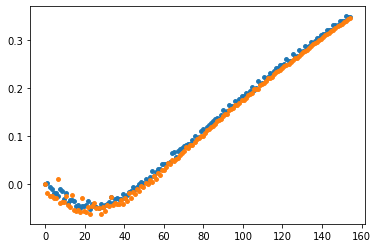

In [ ]:


path=pathy+'data2022-04-28-23-58-41.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)



In [8]:


path=pathy+'data2022-04-28-14-05-13.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

path=pathy+'data2022-04-28-14-08-58.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-28-14-05-13.h5 does not exist

In [ ]:




path=pathy+'data2022-04-28-14-57-49.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

path=pathy+'data2022-04-28-14-59-16.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

In [9]:




path=pathy+'data2022-04-28-14-57-49.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)

path=pathy+'data2022-04-28-14-59-16.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-28-14-57-49.h5 does not exist

In [ ]:
path=pathy+'data2022-04-29-12-23-35.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.2,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()




FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-29-12-23-35.h5 does not exist

In [10]:
path=pathy+'data2022-04-29-12-31-02.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.2,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-29-12-31-02.h5 does not exist

In [11]:


path=pathy+'data2022-04-29-14-13-57.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.2,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-29-14-13-57.h5 does not exist

In [ ]:

################
################

path=pathy+'data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################

path=pathy+'data2022-04-29-13-36-53.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])


################
################

path=pathy+'data2022-04-29-14-13-57.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################
path=pathy+'data2022-04-29-14-46-14.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

################
################
path=pathy+'data2022-04-29-13-00-11.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

# ################
# ################

# path=pathy+'data2022-04-29-11-59-06.h5'
# df = pd.read_hdf(path)
# df=df.sort_values(by=['theta'])
# tss=df['T'].unique()


# plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
# plt.plot(df['theta'], df['SE'])

plt.legend(ncol=2)
plt.show()

In [12]:

################
################

path=pathy+'data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()
################
################

path=pathy+'data2022-04-29-13-36-53.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()

################
################

path=pathy+'data2022-04-29-14-13-57.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()

################
################
path=pathy+'data2022-04-29-14-46-14.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()

################
################
path=pathy+'data2022-04-29-13-00-11.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()
################
################

path=pathy+'data2022-04-29-11-59-06.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()


plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.plot(df['theta'], df['SE'])

plt.legend()
plt.show()



FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-28-23-21-05.h5 does not exist

Machine arg is, CH1


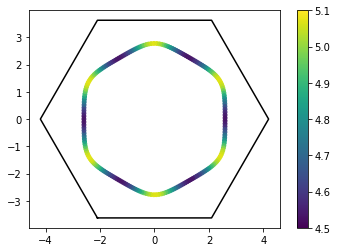

Machine arg is, CH1


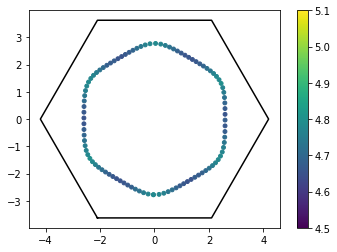

Machine arg is, CH1


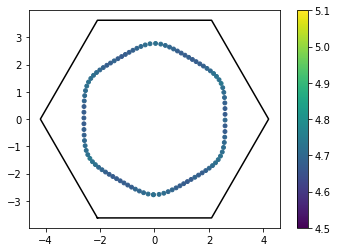

Machine arg is, CH1


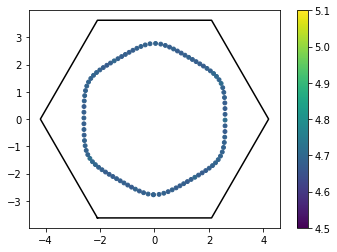

Machine arg is, CH1


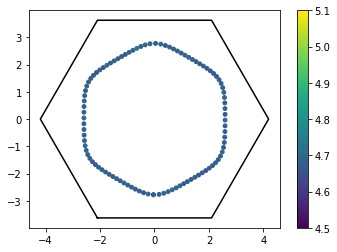

In [13]:

################
################

path=pathy+'data_sweeps_FS/data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()


l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


################
################

path=pathy+'data_sweeps_FS/data2022-04-29-13-36-53.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()



l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


################
################

path=pathy+'data_sweeps_FS/data2022-04-29-14-13-57.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()



l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


################
################
path=pathy+'data_sweeps_FS/data2022-04-29-13-00-11.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()



l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


################
################

path=pathy+'data_sweeps_FS/data2022-04-29-11-59-06.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()




l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()



Machine arg is, CH1


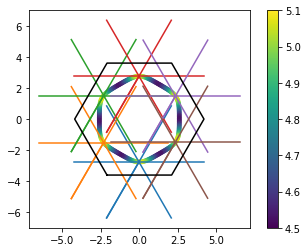

In [5]:

################
################

path=pathy+'data_sweeps_FS/data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
for j in range(6):
    for i in range(np.size(vx)):
        ind=int(j*np.size(df['KFX'])/6)
        line_x=np.array([0,vx[i]])+ df['KFX'][ind]
        line_y=np.array([0,vy[i]])+ df['KFY'][ind]
        plt.plot(line_x,line_y, c=sns.color_palette()[j])

plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

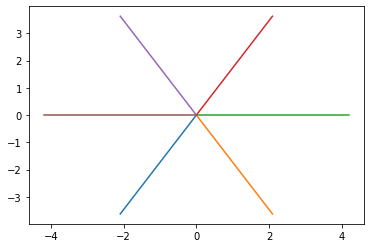

In [6]:
[vx,vy]=l.boundary()
for i in range(6):

    line_x=np.array([0,vx[i]])
    line_y=np.array([0,vy[i]])
    plt.plot(line_x,line_y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

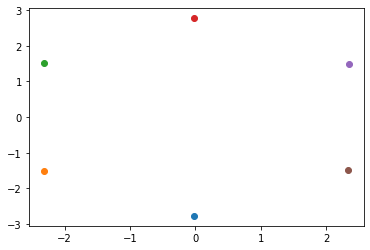

In [7]:
for j in range(6):
   
    ind=int(j*np.size(df['KFX'])/6)
    line_x=[df['KFX'][ind]]
    line_y=[df['KFY'][ind]]
    plt.scatter(line_x,line_y, c=sns.color_palette()[j])


Machine arg is, CH1
-2.0943951023931953 -2.456129702656269 -3.627598728468436 3.3942541911901425
2.0943951023931953 -2.456129702656269 -3.627598728468436 3.3942541911901425
4.188790204786391 -2.456129702656269 0.0 3.3942541911901425
2.094395102393195 -2.456129702656269 3.627598728468436 3.3942541911901425
-2.094395102393195 -2.456129702656269 3.627598728468436 3.3942541911901425
-4.188790204786391 -2.456129702656269 0.0 3.3942541911901425
-2.0943951023931953 -2.456129702656269 -3.627598728468436 3.3942541911901425
-2.0943951023931953 2.8052911713036224 -3.627598728468436 3.1133748349368044
2.0943951023931953 2.8052911713036224 -3.627598728468436 3.1133748349368044
4.188790204786391 2.8052911713036224 0.0 3.1133748349368044
2.094395102393195 2.8052911713036224 3.627598728468436 3.1133748349368044
-2.094395102393195 2.8052911713036224 3.627598728468436 3.1133748349368044
-4.188790204786391 2.8052911713036224 0.0 3.1133748349368044
-2.0943951023931953 2.8052911713036224 -3.627598728468436

/var/folders/s3/40l5x__x3hd75xdyv2tqmfyh0000gn/T/ipykernel_92015/3326416474.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  if np.abs(difvecx-vx[vec])/np.abs(vx[vec])<1e-1 and np.abs(difvecy-vy[vec])/np.abs(vy[vec])<1e-1:


 3.8238526828232238 3.627598728468436 -1.7099183634549417
-2.094395102393195 3.8238526828232238 3.627598728468436 -1.7099183634549417
-4.188790204786391 3.8238526828232238 0.0 -1.7099183634549417
-2.0943951023931953 3.8238526828232238 -3.627598728468436 -1.7099183634549417
-2.0943951023931953 3.758730930667947 -3.627598728468436 -1.8509715148085268
2.0943951023931953 3.758730930667947 -3.627598728468436 -1.8509715148085268
4.188790204786391 3.758730930667947 0.0 -1.8509715148085268
2.094395102393195 3.758730930667947 3.627598728468436 -1.8509715148085268
-2.094395102393195 3.758730930667947 3.627598728468436 -1.8509715148085268
-4.188790204786391 3.758730930667947 0.0 -1.8509715148085268
-2.0943951023931953 3.758730930667947 -3.627598728468436 -1.8509715148085268
-2.0943951023931953 3.692175245034303 -3.627598728468436 -1.994215756356427
2.0943951023931953 3.692175245034303 -3.627598728468436 -1.994215756356427
4.188790204786391 3.692175245034303 0.0 -1.994215756356427
2.09439510239319

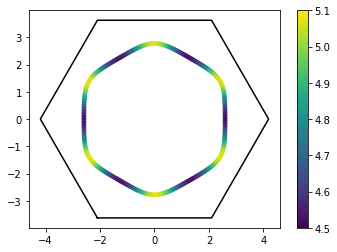

In [24]:

################
################

path=pathy+'data_sweeps_FS/data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
# for j in range(6):
#     for i in range(np.size(vx)):
#         ind=int(j*np.size(df['KFX'])/6)
#         line_x=np.array([0,vx[i]])+ df['KFX'][ind]
#         line_y=np.array([0,vy[i]])+ df['KFY'][ind]
#         plt.plot(line_x,line_y, c=sns.color_palette()[j])

plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()


norm_Q=np.sqrt(vx[0]**2+vy[0]**2)

Npoints_FS=np.size(df['KFX'])
kfx=df['KFX']
kfy=df['KFY']
c=0
[vx,vy]=l.boundary()

for i in range(int(Npoints_FS)): #only checking half of the points is enough
    bx=kfx[i]
    by=kfy[i]
    dist=np.sqrt( (kfx-bx)**2 +(kfy-by)**2)
    # plt.plot()
    mindist_Q=np.min(np.abs(dist-norm_Q))
    
    if np.abs(mindist_Q)<1e-2:
        ind_mindist=np.argmin(np.abs(dist-norm_Q))
        
        QX=kfx[ind_mindist]
        QY=kfy[ind_mindist]
                
        difvecx=QX-bx
        difvecy=QY-by
        for vec  in range(np.size(vx)):
            print(vx[vec],difvecx,vy[vec],difvecy)
            if np.abs(difvecx-vx[vec])/np.abs(vx[vec])<1e-1 and np.abs(difvecy-vy[vec])/np.abs(vy[vec])<1e-1:
                c=c+1

                line_x=np.array([bx,QX])
                line_y=np.array([by,QY])
                plt.plot(line_x,line_y, c=sns.color_palette()[0])
                print(dist[ind_mindist],norm_Q)
        
plt.show()     

Machine arg is, CH1
4.165659935666238 4.188790204786391 4 1.0 1
4.215747758475751 4.188790204786391 2 1.0 2
4.166177838407526 4.188790204786391 0 1.0 3
4.162947331034093 4.188790204786391 1 1.0 4
4.1648457107989305 4.188790204786391 5 1.0 5
4.162154626684627 4.188790204786391 3 1.0 6


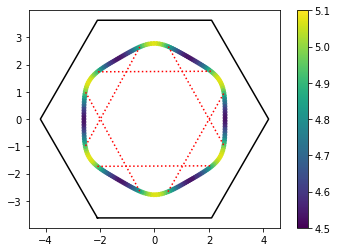

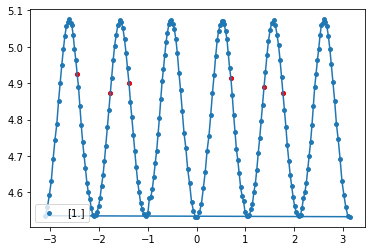

In [84]:
#REQUIRES TO PLAY A LOT WITH PARAMETERS, HOPEFULLY NOT A PROBLEM IF THE FS WAS SAMPLED VERY FINELY
################
################

path=pathy+'data_sweeps_FS/data2022-04-28-23-21-05.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

import seaborn as sns

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15, vmax=5.1,vmin=4.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

norm_Q=np.sqrt(vx[0]**2+vy[0]**2)

Npoints_FS=np.size(df['KFX'])
kfx=df['KFX']
kfy=df['KFY']
c=0
[vx,vy]=l.boundary()
vx=vx[:-1]
vy=vy[:-1]
c=np.zeros(np.size(vx))
c2=0
index_HS=[]
for i in range(int(Npoints_FS)): #only checking half of the points is enough
    bx=kfx[i]
    by=kfy[i]
    for j  in range(np.size(vx)):
        vvx=vx[j]
        vvy=vy[j]
        dist=np.sqrt( (kfx-bx-vvx)**2 +(kfy-by-vvy)**2)
        ind_mindist=np.argmin(dist)
        dist=np.sqrt( (kfx-bx)**2 +(kfy-by)**2)
        if np.abs(dist[ind_mindist]-norm_Q)<2.9e-2 and c[j]<1:
            c[j]=1+c[j]
            QX=kfx[ind_mindist]
            QY=kfy[ind_mindist]
            line_x=np.array([bx,QX])
            line_y=np.array([by,QY])
            plt.plot(line_x,line_y,  c='r', ls=':')
            c2=c2+1
            print(dist[ind_mindist],norm_Q, j, c[j],c2)
            index_HS.append(i)
plt.show()




plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.scatter(df['theta'][index_HS], df['SE'][index_HS],  s=15,c='r')
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()

def lor(KHSloc, K):
    a=2
    b=3
    
    return 

plt.scatter(df['theta'], df['SE'],  s=15,label=str(tss))
plt.scatter(df['theta'][index_HS], df['SE'][index_HS],  s=15,c='r')
plt.plot(df['theta'], df['SE'])
plt.legend()
plt.show()

<ipython-input-18-37f4feb71296>:4: RuntimeWarning: invalid value encountered in true_divide
  expr=x/(np.exp(x)-1)


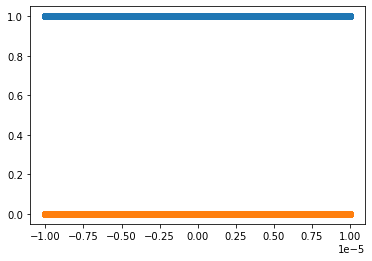

In [18]:
x=linspace(-1e-5,1e-5, 100001)

def xnb(x):
    expr=x/(np.exp(x)-1)
    problems=np.where(np.isnan(expr))[0]
    expr[problems]=1
    return expr

def xnf(x):
    expr=x/(np.exp(x)+1)
    problems=np.where(np.isnan(expr))[0]
    expr[problems]=1
    return expr
plt.scatter(x,xnb(x))
plt.scatter(x,xnf(x))

<ipython-input-19-37f4feb71296>:4: RuntimeWarning: invalid value encountered in true_divide
  expr=x/(np.exp(x)-1)


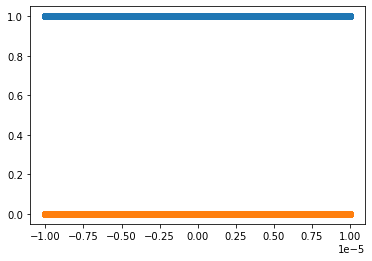

In [19]:
x=linspace(-1e-5,1e-5, 100001)

def xnb(x):
    expr=x/(np.exp(x)-1)
    problems=np.where(np.isnan(expr))[0]
    expr[problems]=1
    return expr

def xnf(x):
    expr=x/(np.exp(x)+1)
    problems=np.where(np.isnan(expr))[0]
    expr[problems]=1
    return expr
plt.scatter(x,xnb(x))
plt.scatter(x,xnf(x))

<ipython-input-19-37f4feb71296>:4: RuntimeWarning: invalid value encountered in true_divide
  expr=x/(np.exp(x)-1)


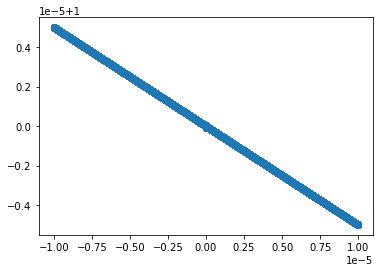

In [20]:
import warnings
plt.scatter(x,xnb(x))
# plt.scatter(x,xnf(x))
warnings.filterwarnings("ignore")


In [21]:
def be_nb( e, T):
    rat=np.max(np.abs(e/T))
    if rat<700:
        x=e/T
        expr=x/(np.exp(x)-1)
        problems=np.where(np.isnan(expr))[0]
        expr[problems]=1
        return expr
    else:
        return -(e/T)*np.heaviside(-e,0.5)

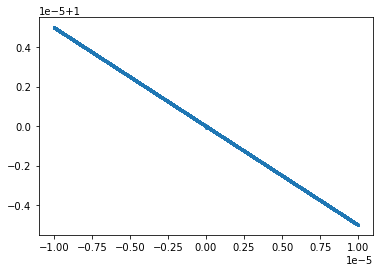

In [22]:
plt.scatter(x,be_nb( x, 1), s=1)

Machine arg is, CH1


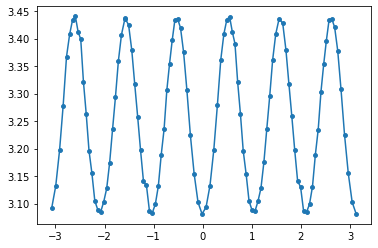

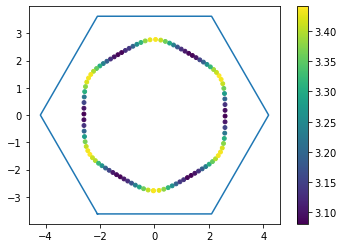

In [23]:




path=pathy+'data2022-04-30-10-52-10.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

Machine arg is, CH1


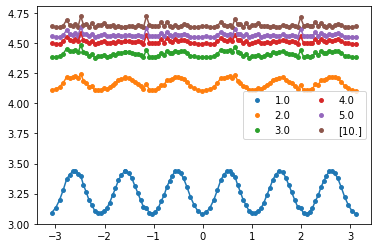

In [24]:
d


Machine arg is, CH1


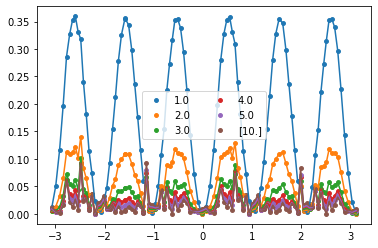

In [25]:
################
################

path=pathy+'data2022-04-30-10-52-10.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))

################
################

path=pathy+'data2022-04-30-11-14-39.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))


################
################

path=pathy+'data2022-04-30-12-05-20.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))

################
################
path=pathy+'data2022-04-30-12-09-42.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))

################
################
path=pathy+'data2022-04-30-11-18-48.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=float(df['T'].unique()[0])


plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))

# # ################
# # ################

path=pathy+'data2022-04-30-12-19-32.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])
tss=df['T'].unique()


plt.scatter(df['theta'], df['SE']-np.min(df['SE']),  s=15,label=str(tss))
plt.plot(df['theta'], df['SE']-np.min(df['SE']))

plt.legend(ncol=2)
plt.show()

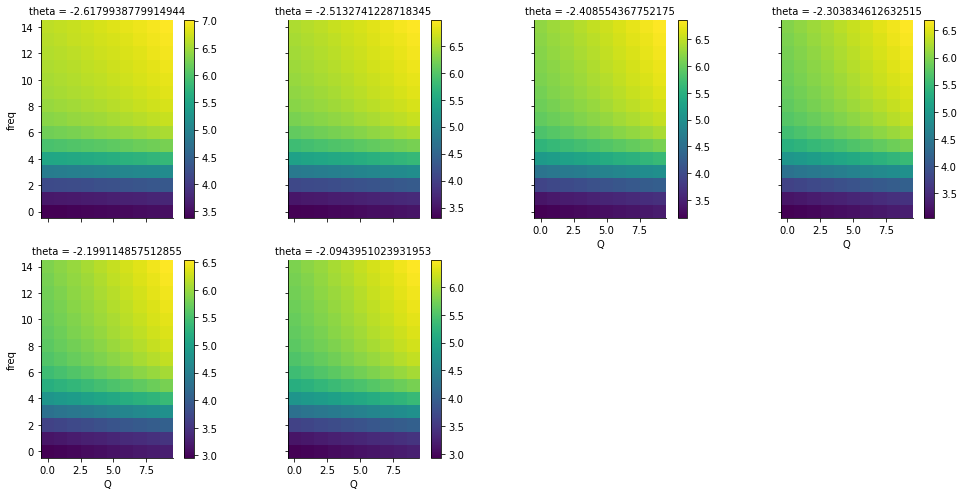

In [36]:

path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df #.loc[(df['theta'] == -4*np.pi/6)]

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    plt.imshow(d, origin='lower')
    plt.colorbar()

fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'Q', 'freq', 'SE', cbar=False, square = True)
# get figure background color



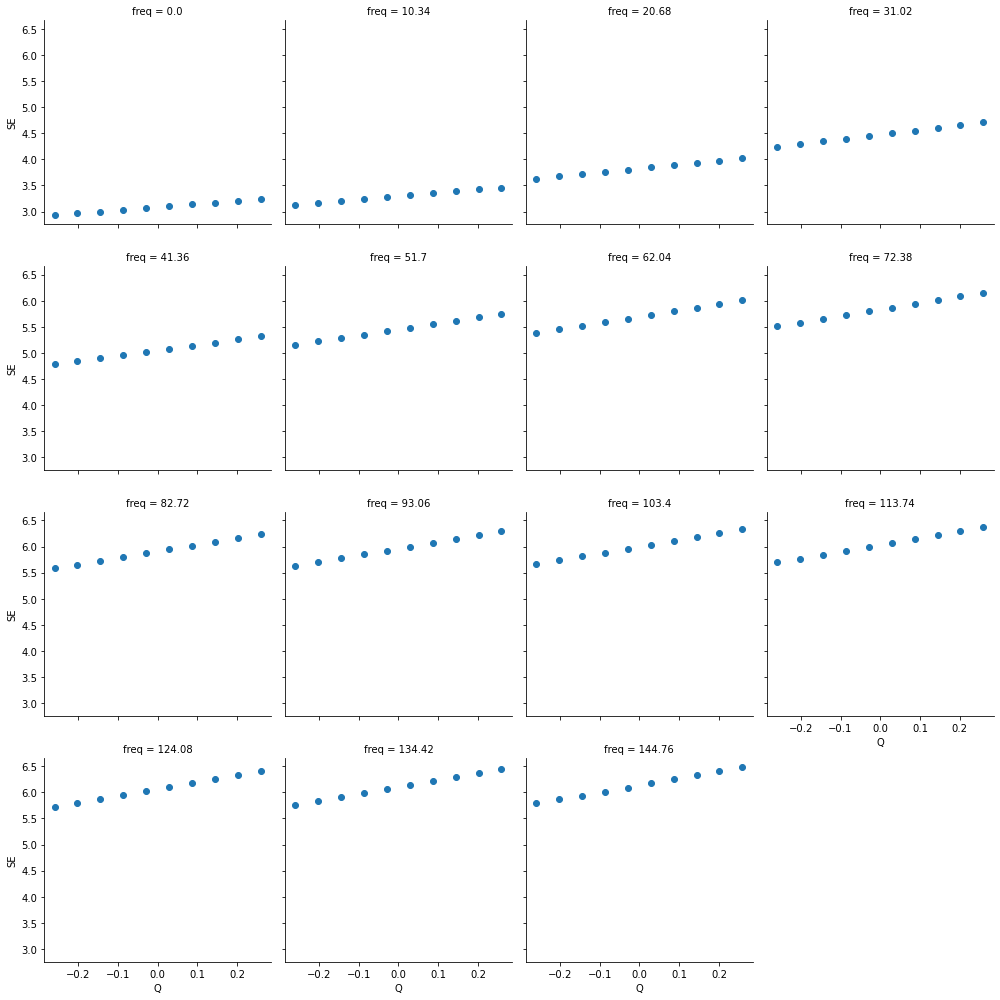

In [37]:

path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)]


def draw(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    


fg = sns.FacetGrid(df_one_temp, col='freq',height=3.5, col_wrap=4)
fg.map_dataframe(draw,  'Q', 'SE', cbar=False, square = True)
# get figure background color


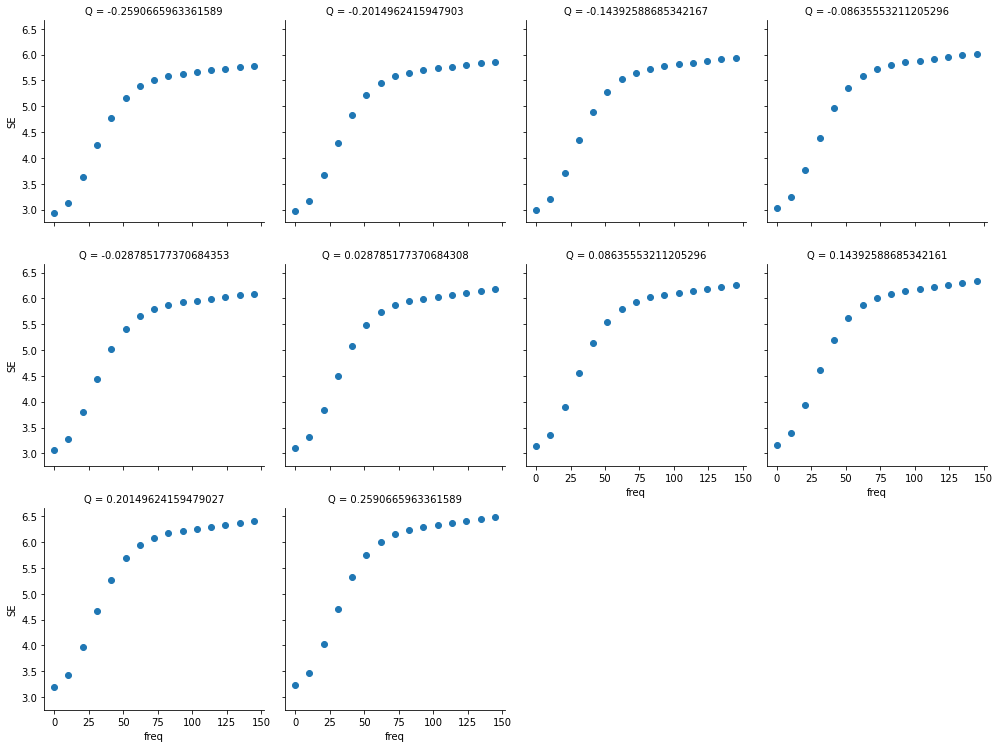

In [38]:
path=pathy+'T1data_ME_2022-05-01-14-38-23.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)]


def draw(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    


fg = sns.FacetGrid(df_one_temp, col='Q',height=3.5, col_wrap=4)
fg.map_dataframe(draw,  'freq', 'SE', cbar=False, square = True)
# get figure background color

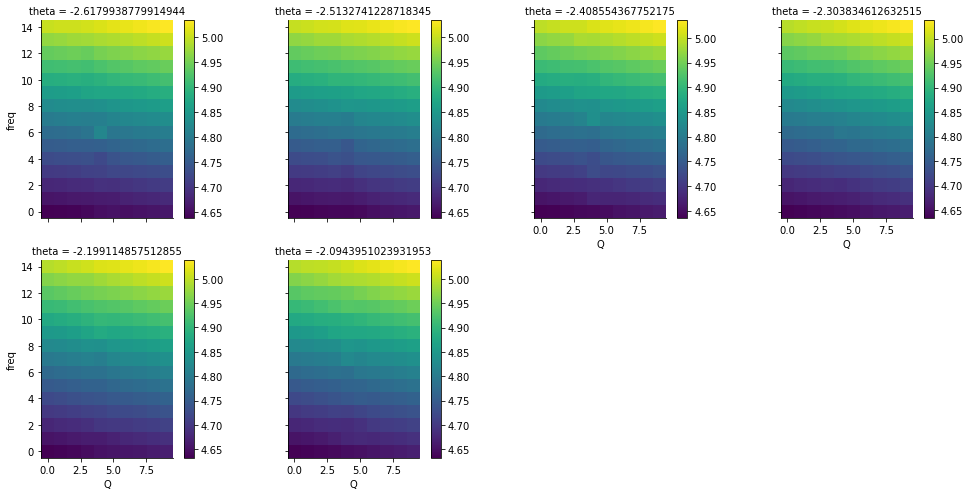

In [78]:


path=pathy+'data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df #.loc[(df['theta'] == -4*np.pi/6)]

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # sns.heatmap(d, **kwargs)
    plt.imshow(d, origin='lower')
    plt.colorbar()

fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'Q', 'freq', 'SE', cbar=False, square = True)
# get figure background color

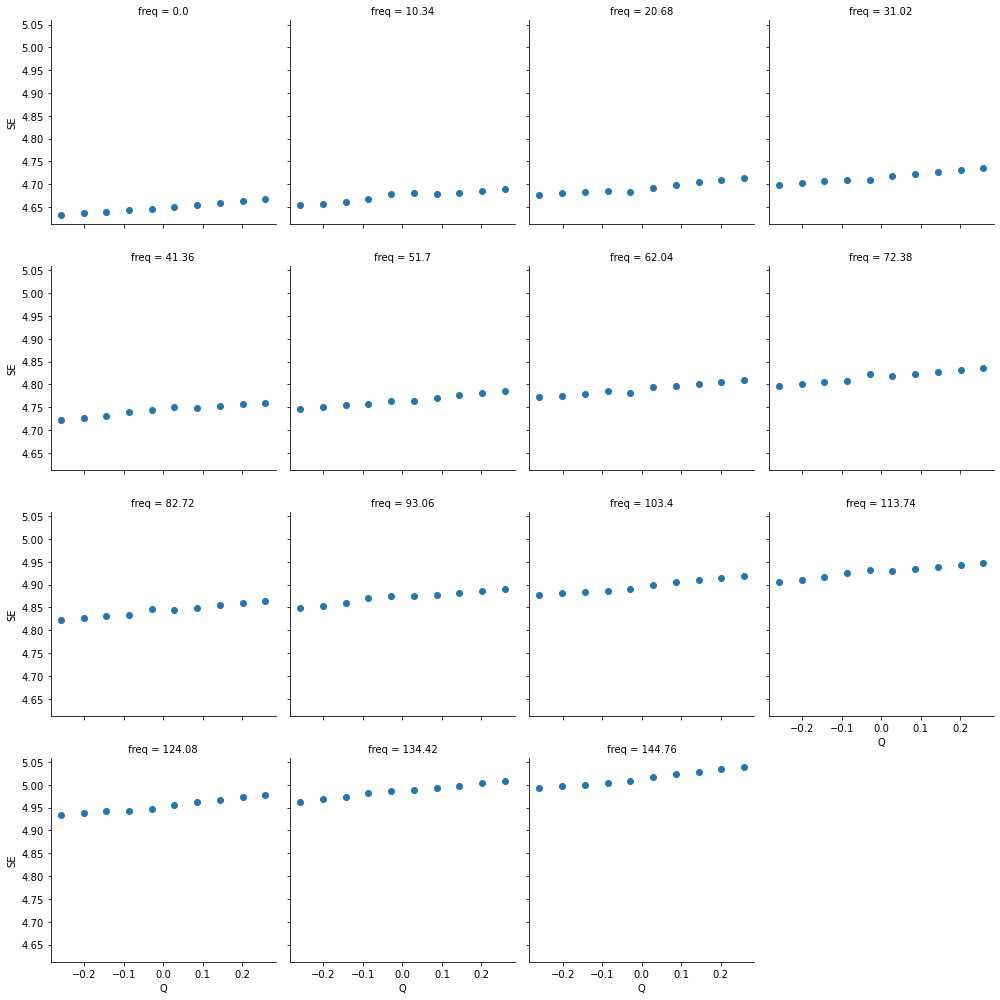

In [82]:

path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'
df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)]


def draw(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    


fg = sns.FacetGrid(df_one_temp, col='freq',height=3.5, col_wrap=4)
fg.map_dataframe(draw,  'Q', 'SE', cbar=False, square = True)
# get figure background color


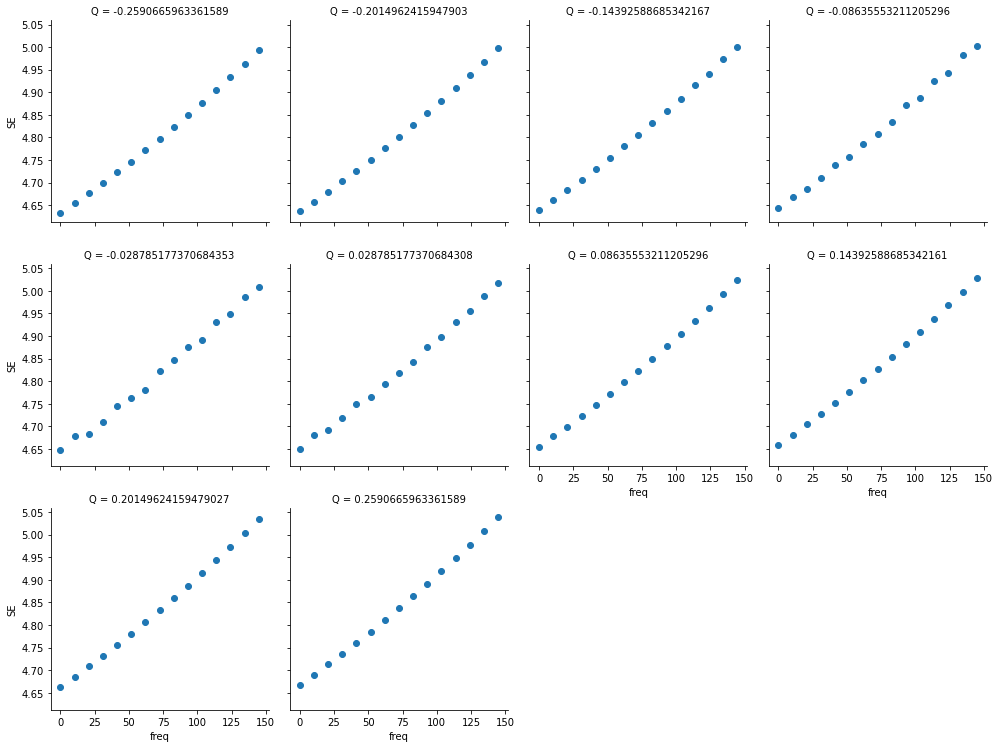

In [83]:


path=pathy+'T10data_ME_2022-05-01-15-49-15.h5'

df = pd.read_hdf(path)
df=df.sort_values(by=['theta','freq', 'Q' ])
tss=float(df['T'].unique()[0])
df.loc[(df['theta'] == -4*np.pi/6)]
df['Q']=df['Q']*np.sign(df['QFX'])
df_one_temp=df.loc[(df['theta'] == -4*np.pi/6)]


def draw(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    plt.scatter(d1,d2)
    


fg = sns.FacetGrid(df_one_temp, col='Q',height=3.5, col_wrap=4)
fg.map_dataframe(draw,  'freq', 'SE', cbar=False, square = True)
# get figure background color

Machine arg is, CH1


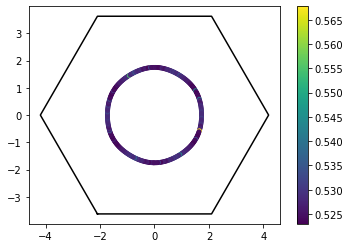

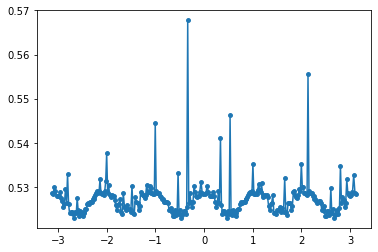

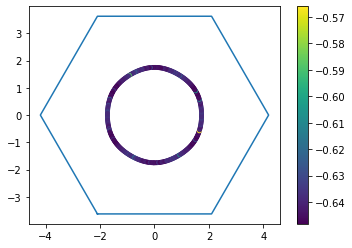

In [10]:

################
################

path=pathy+'data2022-05-05-13-37-20.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()


l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()



# path=pathy+'data2022-04-30-10-52-10.h5'
# df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])


plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=np.log(df['SE']),  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

Machine arg is, CH1


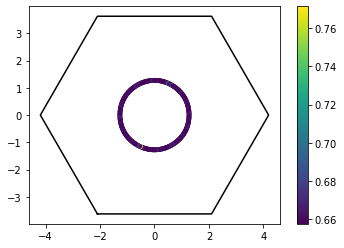

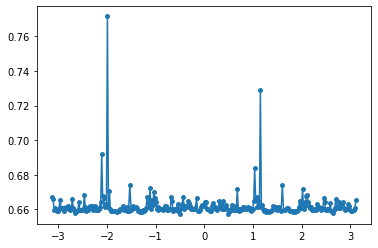

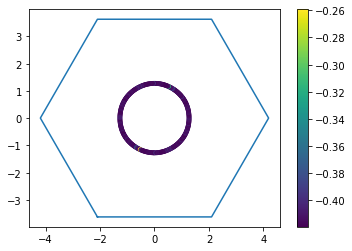

In [11]:

################
################

path=pathy+'data2022-05-05-13-49-52.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()


l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()



# path=pathy+'data2022-04-30-10-52-10.h5'
# df = pd.read_hdf(path)
df=df.sort_values(by=['theta'])


plt.scatter(df['theta'], df['SE'],  s=15)
plt.plot(df['theta'], df['SE'])
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=np.log(df['SE']),  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()